In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import os
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt

from scripts.load_aggregated_results import PLOT_DIR, DIS_METRICS, HUMAN_READABLE_NAMES, get_metric_df

In [23]:
if not 'workbook_dir' in globals():
    workbook_dir = os.getcwd()
    os.chdir(Path(workbook_dir).parent.parent)
print('workbook_dir: ' + workbook_dir)
print('current dir: ' + os.getcwd())

workbook_dir: /home/alek/PycharmProjects/disentanglement_lib/plots/notebooks
current dir: /home/alek/PycharmProjects/disentanglement_lib


In [4]:
df = pd.read_pickle(PLOT_DIR / 'hnlpca_results.pickle')

In [5]:
df.loc[df['group_id'].str.contains('hnlpca')].groupby(['train_config.dataset.name', 'group_id']).size()

train_config.dataset.name  group_id                 
'cars3d'                   hnlpca                       300
                           hnlpca_balanced              300
'color_dsprites'           hnlpca                       300
                           hnlpca_balanced              300
                           hnlpca_balanced_intrinsic    462
                           hnlpca_intrinsic             529
'dsprites_full'            hnlpca                       300
                           hnlpca_balanced              300
'noisy_dsprites'           hnlpca                       300
                           hnlpca_balanced              300
'scream_dsprites'          hnlpca                       300
                           hnlpca_balanced              300
                           hnlpca_balanced_intrinsic    498
                           hnlpca_intrinsic             414
'shapes3d'                 hnlpca                       300
                           hnlpca_balanced     

In [6]:
print(len(df))
intrinsic_datasets = (
    'color_dsprites', 
    'scream_dsprites', 
    'smallnorb',
)
for dataset in df['train_config.dataset.name'].unique():
    if dataset.replace("'", '') in intrinsic_datasets:
        continue
    
    for group_id in (
        'hnlpca',
        'hnlpca_balanced',
    ):
        new_rows = df.loc[
            (df['train_config.dataset.name'] == dataset) &
            (df['group_id'] == group_id)
        ].copy()
        new_rows['group_id'] += '_intrinsic'
        
        df = pd.concat([df, new_rows])
        
print(len(df))

74482
76882


In [7]:
df_contribs = pd.read_csv(PLOT_DIR / 'contribs_full_color_dims.csv')

In [25]:
import scipy.spatial.distance as sc_dist


def average_min_dist(arr):
    min_dists = []
    for i in range(len(arr)):
        dists = []
        for j in range(len(arr)):
            if i == j:
                continue
            dists.append(np.power(arr[i] - arr[j], 2))
        
        min_dists.append(min(dists))
    
    return sum(min_dists) / len(min_dists)


for dataset in df_contribs['dataset'].unique():
    contribs_dataset = df_contribs.loc[df_contribs['dataset'] == dataset].iloc[0]
    variances = contribs_dataset['variances_all']
    
    print(dataset, average_min_dist(variances))
    
    
df_contribs['avg_min_dist'] = df_contribs.apply(
    lambda row: average_min_dist(row['variances_all']),
    axis=1,
)

dsprites_full 0.0008791173544938002
color_dsprites 0.0004967826414801124
noisy_dsprites 0.00235375030699676
scream_dsprites 0.00011887378565537505
smallnorb 0.11134550493670152
cars3d 0.05163740054875559
shapes3d 0.0038148711519024655


In [8]:
contribs_col_names = (
    'diffs',
    'diffs_all',
    'variances',
    'variances_all',
)
for col_name in contribs_col_names:
    df_contribs[col_name] = df_contribs.apply(
        lambda row: np.fromstring(row[col_name].replace('[', '').replace(']', ''), sep=' '),
        axis=1,
    )
for col_name in contribs_col_names:
    df_contribs[f'std_{col_name}'] = df_contribs.apply(
        lambda row: row[col_name].std(),
        axis=1,
    )

In [26]:
df_contribs

,dataset,diffs,diffs_all,variances,variances_all,std_diffs,std_diffs_all,std_variances,std_variances_all,avg_min_dist
0,dsprites_full,"[0.7924798, 0.39387174, 0.21410312, 0.2921085,...","[0.7924798, 0.39387174, 0.21410312, 0.2921085,...","[0.17043662, 0.25081086, 0.19187606, 0.6594006...","[0.17043662, 0.25081086, 0.19187606, 0.6594006...",0.205789,0.205789,0.224762,0.224762,0.000879
1,color_dsprites,"[0.79537514, 0.38898202, 0.21534056, 0.2910940...","[0.00235421, 0.79537514, 0.38898202, 0.2153405...","[0.17085869, 0.2474353, 0.19183103, 0.65982999...","[0.01270697, 0.17085869, 0.2474353, 0.19183103...",0.206940,0.251329,0.225298,0.253806,0.000497
2,noisy_dsprites,"[0.45468359, 0.44726903, 0.44370918, 0.4451544...","[0.45468359, 0.44726903, 0.44370918, 0.4451544...","[0.3264995, 0.41041964, 0.47402903, 0.50014432...","[0.3264995, 0.41041964, 0.47402903, 0.50014432...",0.003912,0.003912,0.066514,0.066514,0.002354
3,scream_dsprites,"[0.75053798, 0.36957635, 0.20349626, 0.2734802...","[0.18869556, 0.75053798, 0.36957635, 0.2034962...","[0.08076045, 0.11782191, 0.0907688, 0.30916492...","[0.51058025, 0.08076045, 0.11782191, 0.0907688...",0.195067,0.178640,0.104170,0.179590,0.000119
4,smallnorb,"[0.16428326, 0.01381377, 0.08923717, 0.97643922]","[0.16428326, 0.10688019, 0.01381377, 0.0892371...","[0.20355376, 0.0752942, 0.19641723, 0.94444489]","[0.20355376, 0.14946828, 0.0752942, 0.19641723...",0.387890,0.356412,0.344153,0.318602,0.111346
5,cars3d,"[0.29775715, 0.43609607, 0.84921193]","[0.29775715, 0.43609607, 0.84921193]","[0.28291616, 0.67647422, 0.67995668]","[0.28291616, 0.67647422, 0.67995668]",0.234261,0.234261,0.186351,0.186351,0.051637
6,shapes3d,"[0.62664961, 0.63682507, 0.2368502, 0.11894065...","[0.62664961, 0.63682507, 0.2368502, 0.11894065...","[0.66320729, 0.68394356, 0.2535421, 0.10878403...","[0.66320729, 0.68394356, 0.2535421, 0.10878403...",0.229537,0.229537,0.260322,0.260322,0.003815


In [29]:
df['dataset_avg_min_dist'] = df.apply(
    lambda row: df_contribs.loc[df_contribs['dataset'] == row['train_config.dataset.name'].replace("'", '')].iloc[0]['avg_min_dist'],
    axis=1,
)

In [10]:
for col_name in contribs_col_names:
    df[f'dataset_std_{col_name}'] = df.apply(
        lambda row: float(
            df_contribs.loc[df_contribs['dataset'] == row['train_config.dataset.name'].replace("'", '')][f'std_{col_name}']
        ),
        axis=1,
    )
    
df_ = df.copy()

In [11]:
df['group_id'].unique()

array(['annealed_10.0', 'annealed_100.0', 'annealed_25.0', 'annealed_5.0',
       'annealed_50.0', 'annealed_75.0', 'beta_vae_1.0', 'beta_vae_16.0',
       'beta_vae_2.0', 'beta_vae_4.0', 'beta_vae_6.0', 'beta_vae_8.0',
       'hnlpca', 'hnlpca_balanced', 'hnlpca_balanced_intrinsic',
       'hnlpca_intrinsic'], dtype=object)

In [12]:
def get_corrs(group_id, contribs_col_name='dataset_std_variances_all'):
    df = df_.copy()
    df = df.loc[df['group_id'] == group_id]
    
    corrs = {}
    for metric in DIS_METRICS:
        df_metric, metric_col_name = get_metric_df(df, metric)
        corrs[HUMAN_READABLE_NAMES[metric]] = df_metric[
            [metric_col_name, contribs_col_name]].corr()[metric_col_name][contribs_col_name]
        
    return corrs
    

In [38]:
for group_id in df['group_id'].unique():
    print(group_id)
    print(get_corrs(group_id))

annealed_10.0
{'FactorVAE Score': 0.13057423385898057, 'MIG': 0.5784551632417132, 'DCI Disentanglement': 0.45081373667109176, 'Modularity': 0.40094826216967694, 'SAP Score': 0.7371409412891999}
annealed_100.0
{'FactorVAE Score': 0.04642607584813111, 'MIG': 0.15254889829864016, 'DCI Disentanglement': 0.3474169259833696, 'Modularity': 0.3337297074736326, 'SAP Score': 0.3419329810001003}
annealed_25.0
{'FactorVAE Score': 0.22566547441616588, 'MIG': 0.44594425646329855, 'DCI Disentanglement': 0.3773693267908527, 'Modularity': 0.3500713090982513, 'SAP Score': 0.7089691854375157}
annealed_5.0
{'FactorVAE Score': 0.09843506615339495, 'MIG': 0.5519502949311975, 'DCI Disentanglement': 0.4362888433526346, 'Modularity': 0.3958962202322695, 'SAP Score': 0.6735664435029382}
annealed_50.0
{'FactorVAE Score': 0.12007665022427613, 'MIG': 0.3496964098761547, 'DCI Disentanglement': 0.3650059429077791, 'Modularity': 0.30267420095863845, 'SAP Score': 0.5330134371461388}
annealed_75.0
{'FactorVAE Score': 0

In [39]:
for group_id in df['group_id'].unique():
    print(group_id)
    print(get_corrs(group_id, 'dataset_avg_min_dist'))

annealed_10.0
{'FactorVAE Score': -0.0326917196672171, 'MIG': -0.08608401950292748, 'DCI Disentanglement': -0.16417519312496437, 'Modularity': 0.6076891009728653, 'SAP Score': 0.313990048318823}
annealed_100.0
{'FactorVAE Score': 0.33177335074410225, 'MIG': 0.19797955533453773, 'DCI Disentanglement': 0.7070525137593254, 'Modularity': 0.5956445674585953, 'SAP Score': 0.48034563400540153}
annealed_25.0
{'FactorVAE Score': 0.10737152473016981, 'MIG': -0.03722828822066156, 'DCI Disentanglement': 0.004328576587061925, 'Modularity': 0.512580493018711, 'SAP Score': 0.4229155424454001}
annealed_5.0
{'FactorVAE Score': -0.02798273493460933, 'MIG': -0.11651343762666595, 'DCI Disentanglement': -0.2689463871308003, 'Modularity': 0.6315206823920357, 'SAP Score': 0.3368256081180247}
annealed_50.0
{'FactorVAE Score': 0.3131452507382993, 'MIG': 0.30868180218814534, 'DCI Disentanglement': 0.6056036963959238, 'Modularity': 0.6052749294189268, 'SAP Score': 0.43538260051800437}
annealed_75.0
{'FactorVAE S

In [47]:
def plot_corrs(group_name, contribs_col_name=None):
    beta_vae_corrs = []
    for group_id in df_['group_id'].unique():
        if group_name in group_id:
            corrs = get_corrs(
                group_id,
                **({'contribs_col_name': contribs_col_name} if contribs_col_name is not None else {}),
            )
            corrs['beta'] = float(group_id.split('_')[-1])
            beta_vae_corrs.append(corrs)

    beta_vae_corrs = pd.DataFrame(beta_vae_corrs)
    display(beta_vae_corrs)

    for metric in DIS_METRICS:
        sns.lineplot(
            data=beta_vae_corrs,
            x='beta',
            y=HUMAN_READABLE_NAMES[metric],
        )
        plt.show()

,FactorVAE Score,MIG,DCI Disentanglement,Modularity,SAP Score,beta
0,0.393472,0.721467,0.787479,0.416149,0.727866,1.0
1,0.127647,0.456321,0.260381,0.253782,0.791610,16.0
2,0.290535,0.753710,0.724625,0.566892,0.796751,2.0
3,0.208014,0.678463,0.484439,0.497692,0.812821,4.0
4,0.011356,0.627765,0.376053,0.383123,0.793952,6.0
5,0.027930,0.603593,0.308385,0.395557,0.788037,8.0


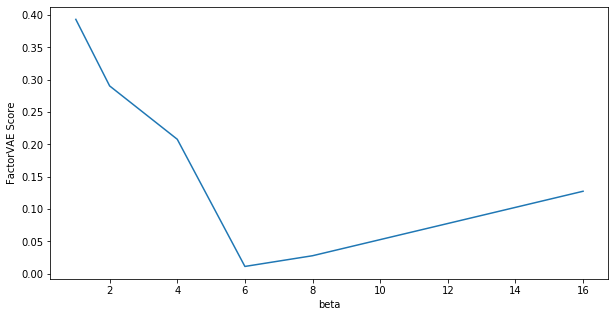

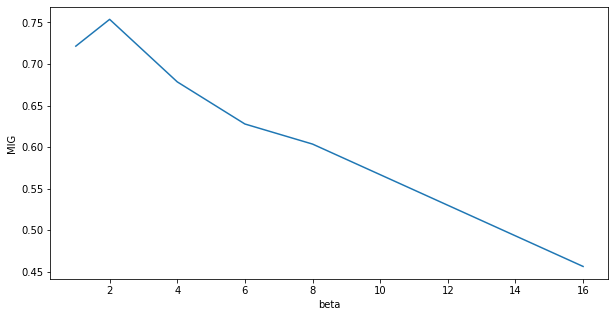

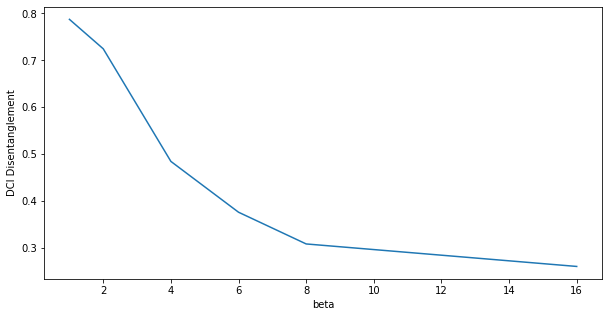

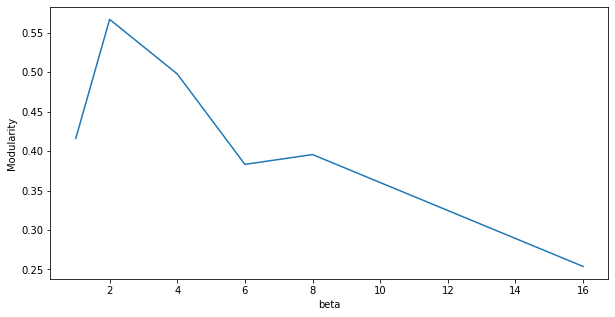

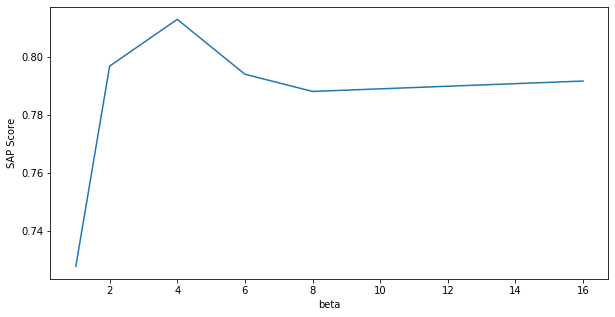

In [46]:
matplotlib.rcParams['figure.figsize'] = (10, 5)

plot_corrs('beta_vae')

,FactorVAE Score,MIG,DCI Disentanglement,Modularity,SAP Score,beta
0,0.220923,0.796491,0.694426,0.197163,0.718426,1.0
1,-0.076888,0.103098,0.005086,0.621820,0.490989,16.0
2,0.076348,0.672872,0.525442,0.421650,0.592197,2.0
3,-0.017367,0.454328,0.239126,0.495648,0.488811,4.0
4,-0.098340,0.487187,0.415915,0.586726,0.559840,6.0
5,-0.166913,0.439999,0.334958,0.613463,0.542503,8.0


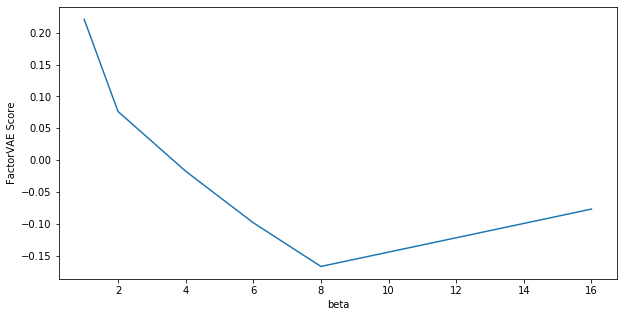

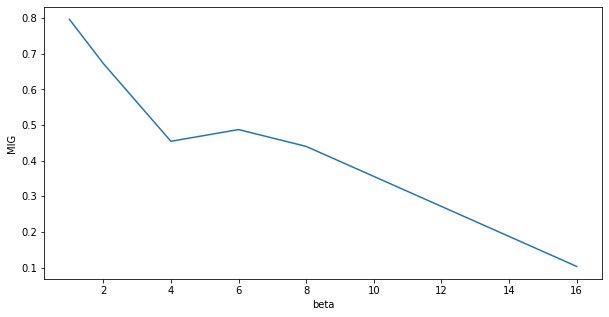

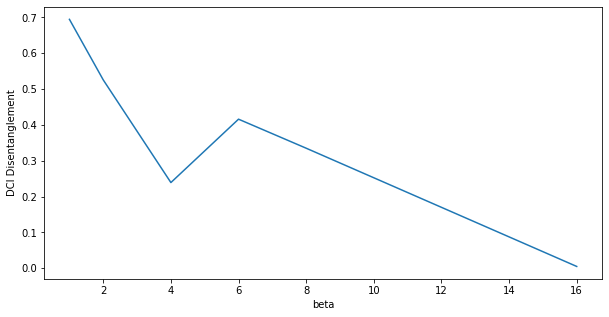

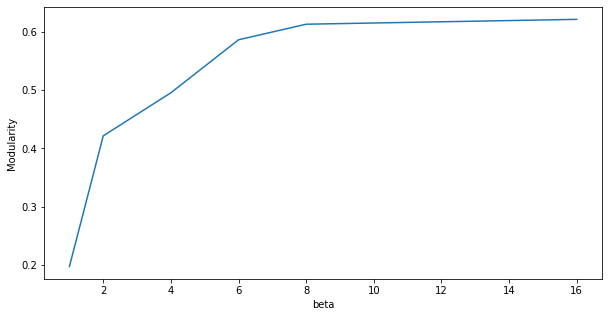

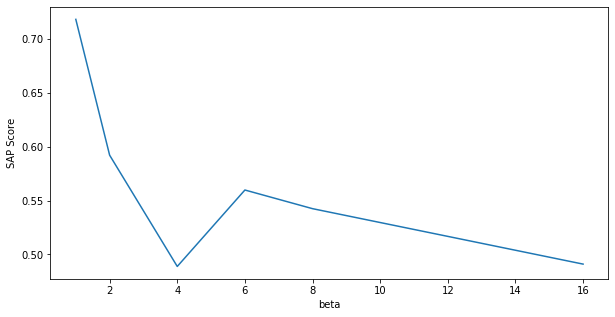

In [48]:
plot_corrs('beta_vae', 'dataset_avg_min_dist')

,FactorVAE Score,MIG,DCI Disentanglement,Modularity,SAP Score,beta
0,-0.032692,-0.086084,-0.164175,0.607689,0.313990,10.0
1,0.331773,0.197980,0.707053,0.595645,0.480346,100.0
2,0.107372,-0.037228,0.004329,0.512580,0.422916,25.0
3,-0.027983,-0.116513,-0.268946,0.631521,0.336826,5.0
4,0.313145,0.308682,0.605604,0.605275,0.435383,50.0
5,0.324677,0.307742,0.661872,0.609876,0.526098,75.0


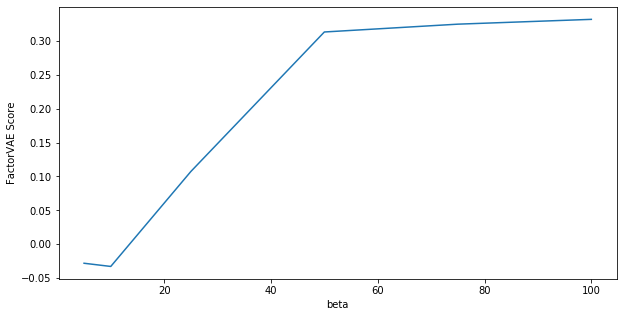

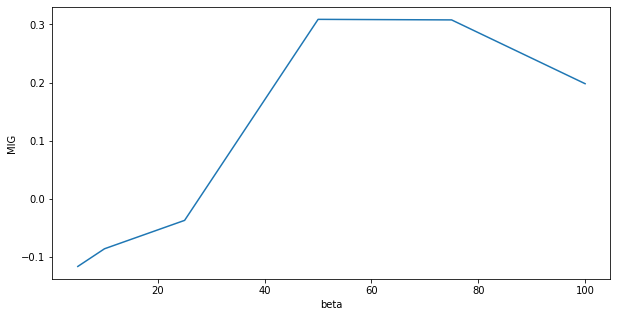

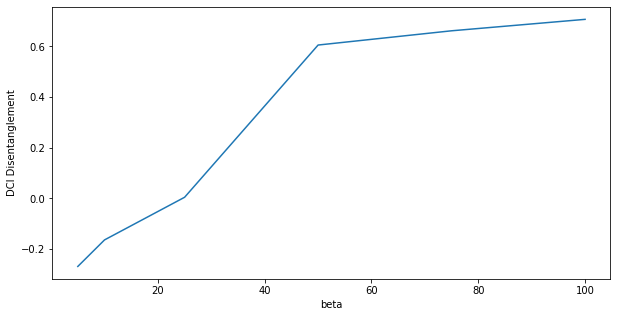

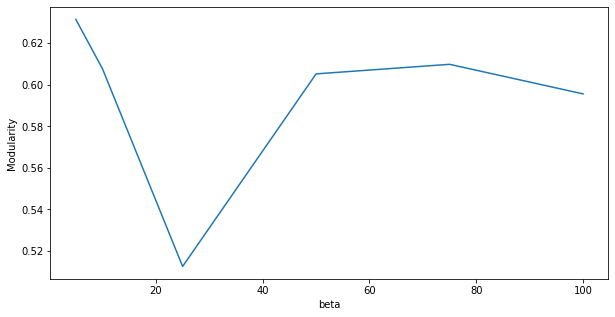

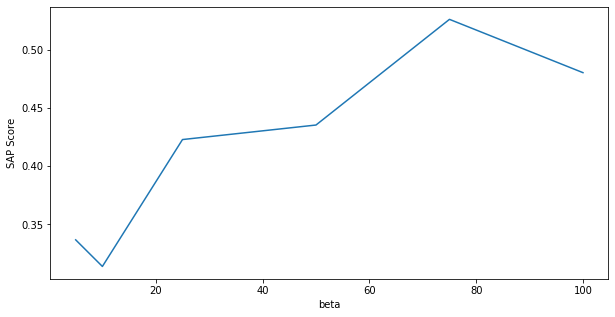

In [49]:
plot_corrs('annealed', 'dataset_avg_min_dist')

In [18]:
def plot_violin(group_id, contribs_col_name='dataset_std_variances_all'):
    df = df_.copy()
    df = df.loc[df['group_id'] == group_id]
    
    for metric in DIS_METRICS:
        df_metric, metric_col_name = get_metric_df(df, metric)
        sns.violinplot(
            data=df_metric,
            x=contribs_col_name,
            y=metric_col_name,
            hue='train_config.dataset.name',
        )
        plt.show()
        

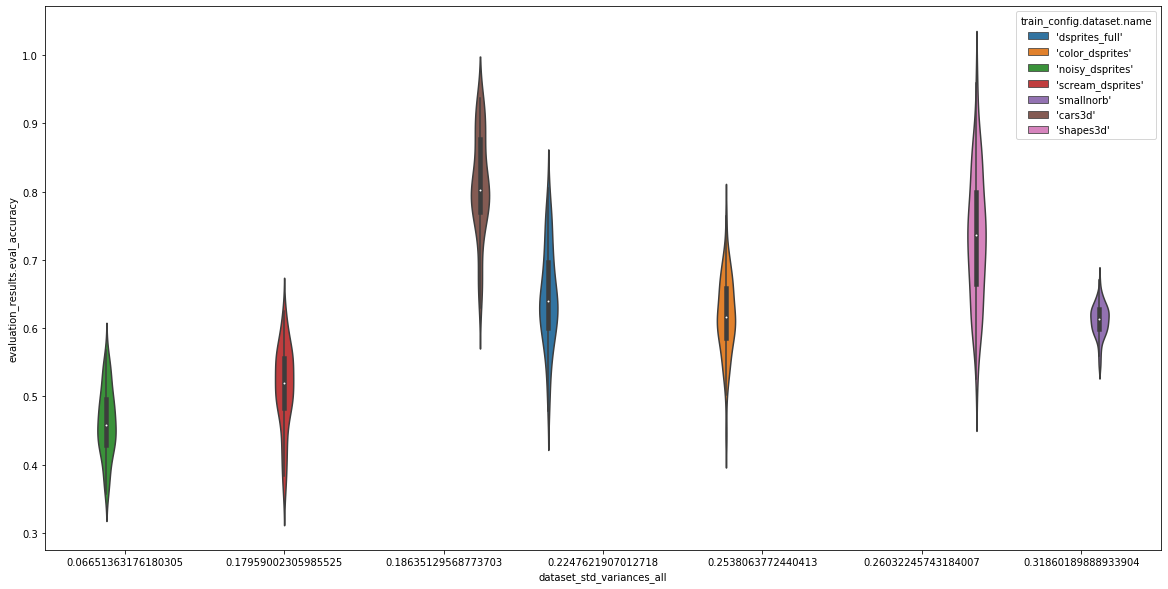

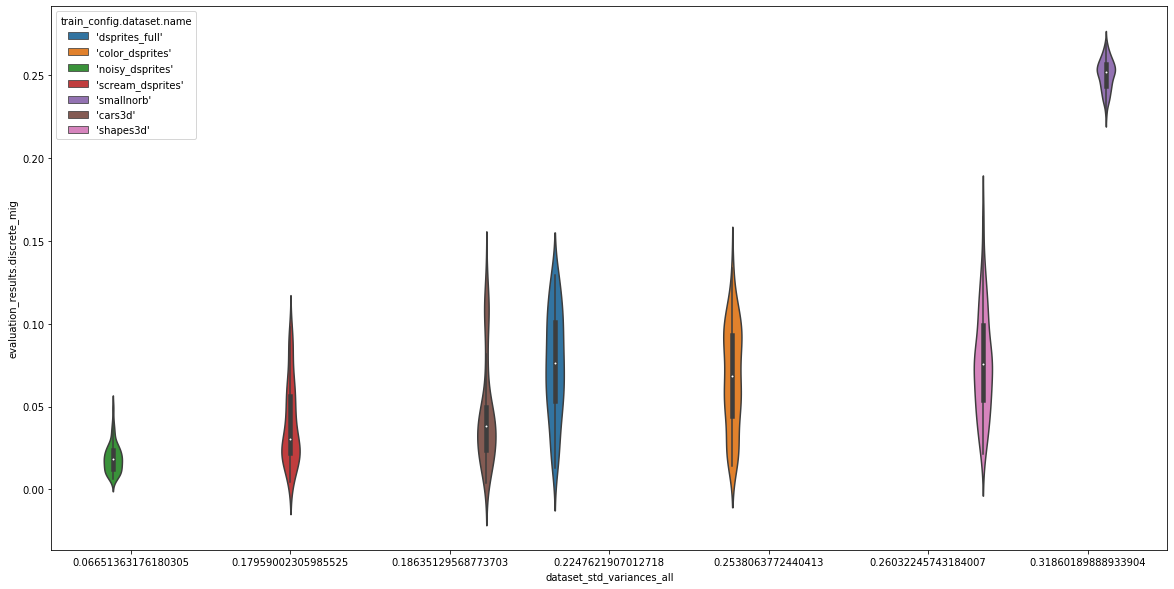

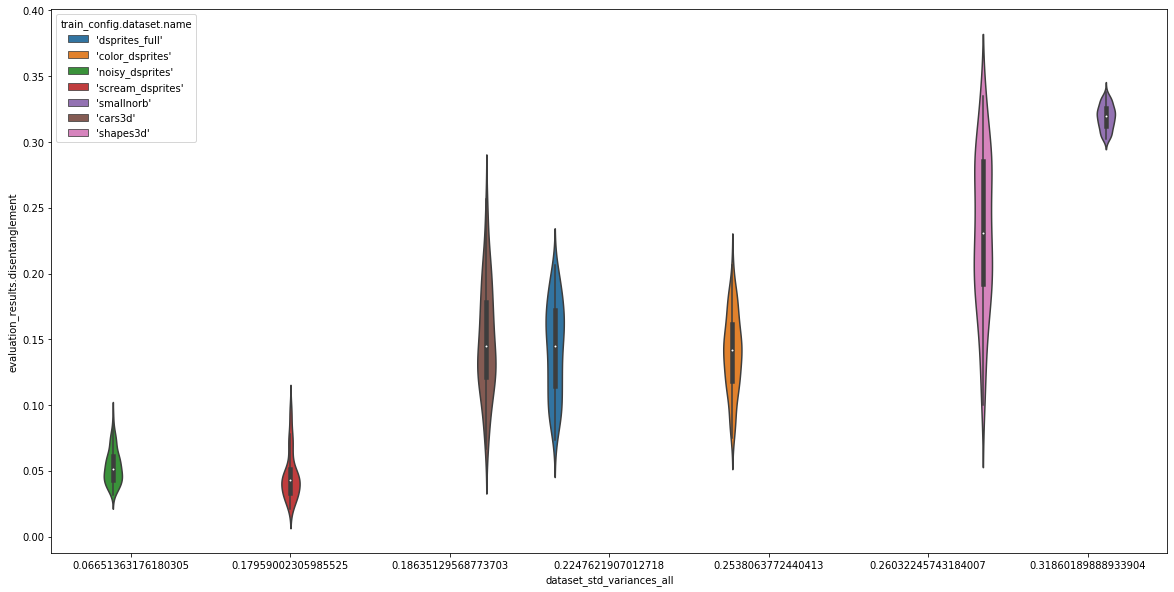

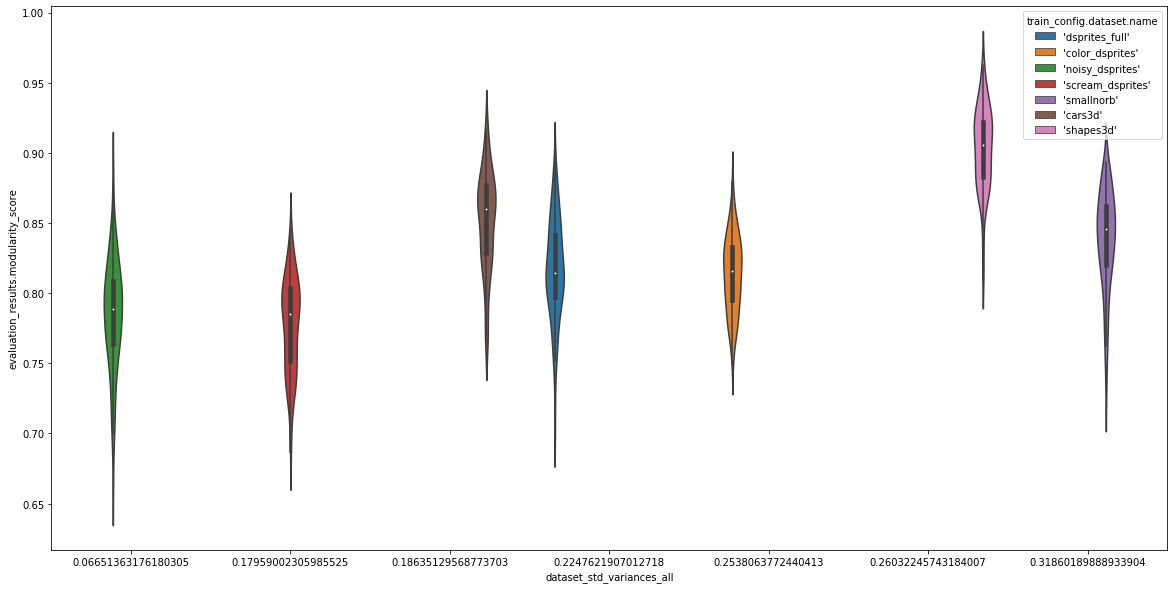

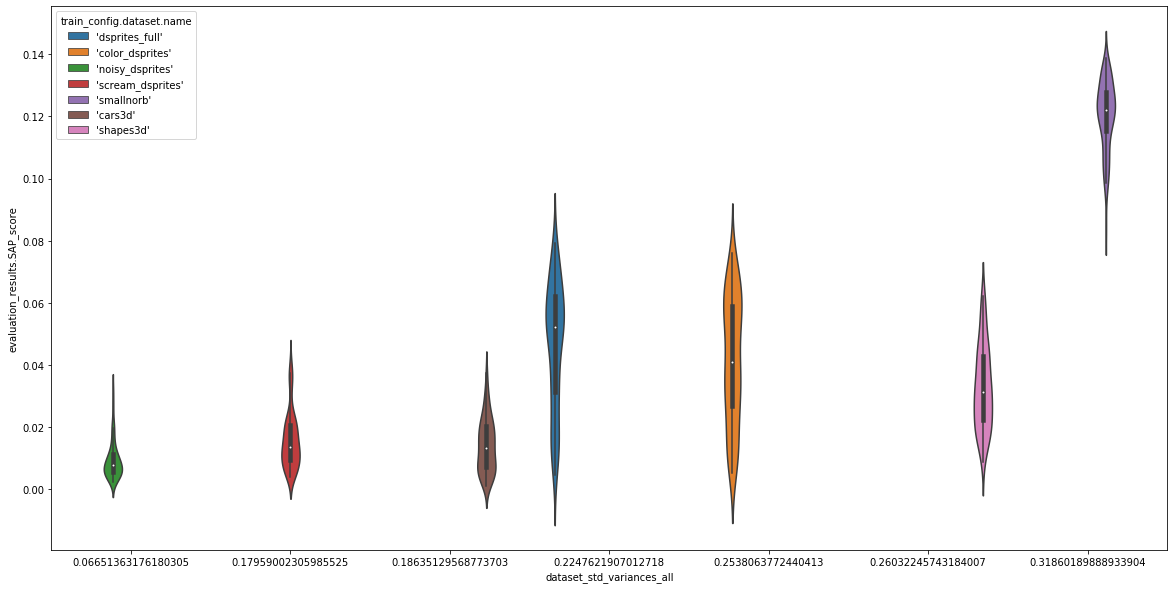

In [19]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

plot_violin('beta_vae_1.0')

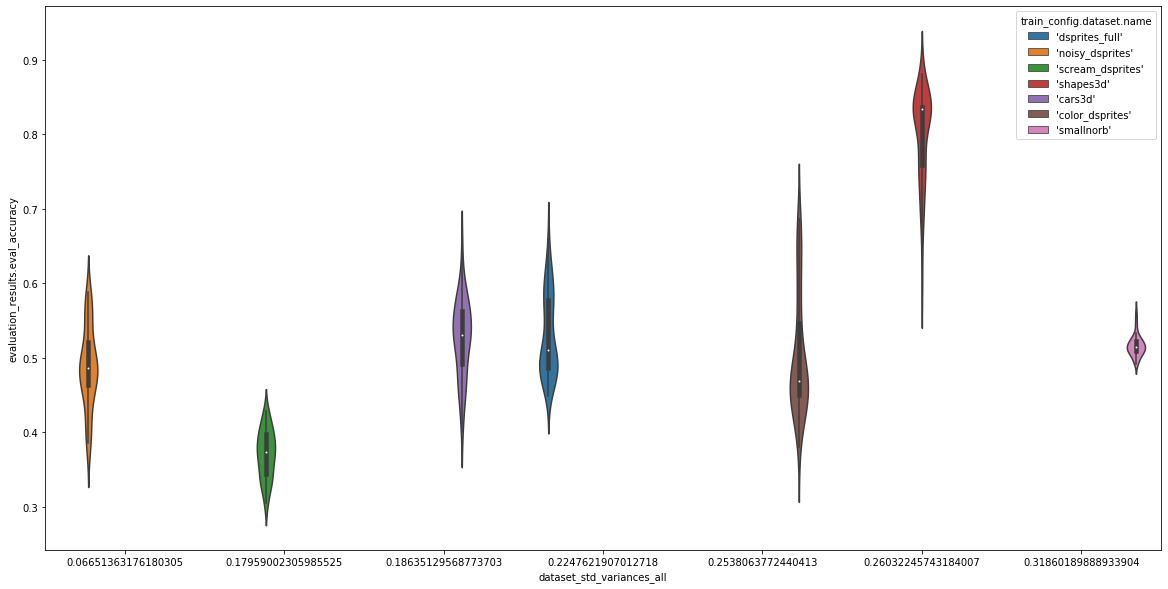

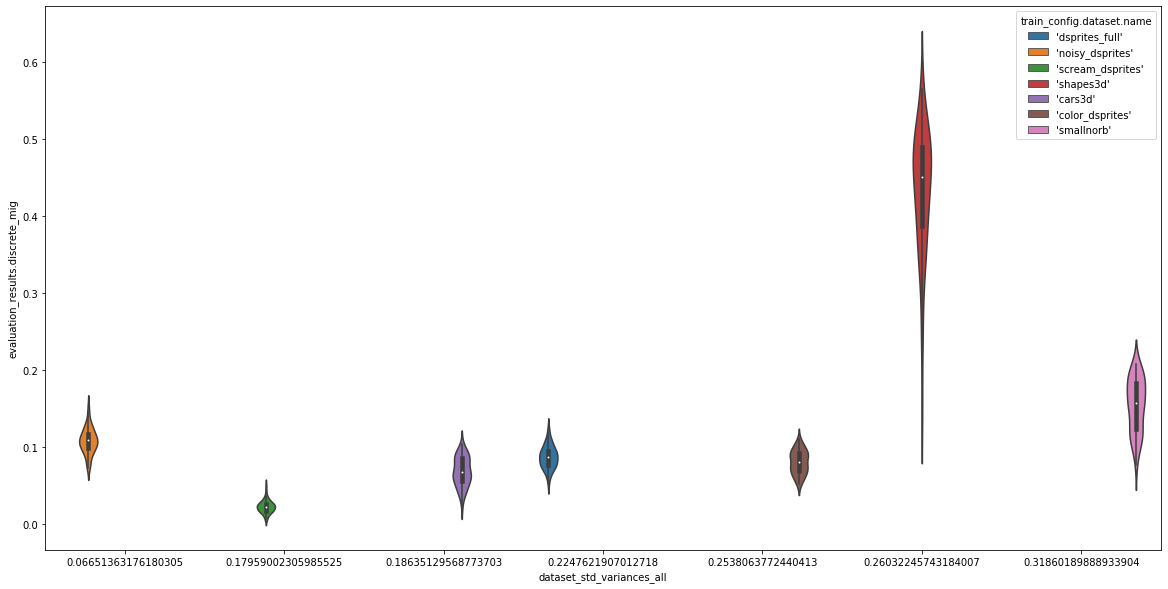

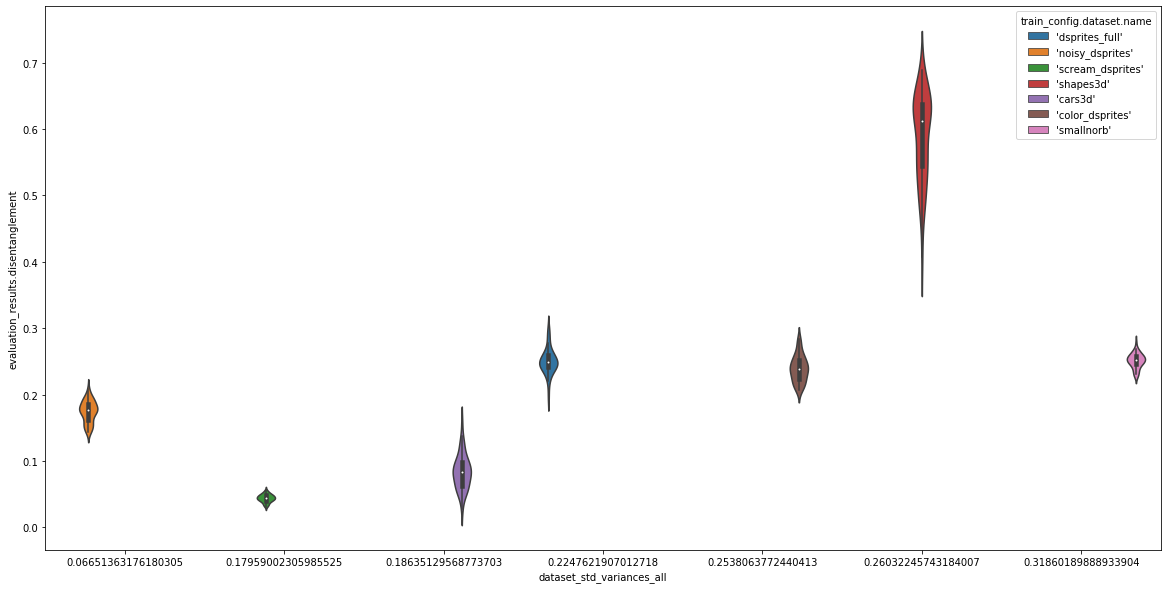

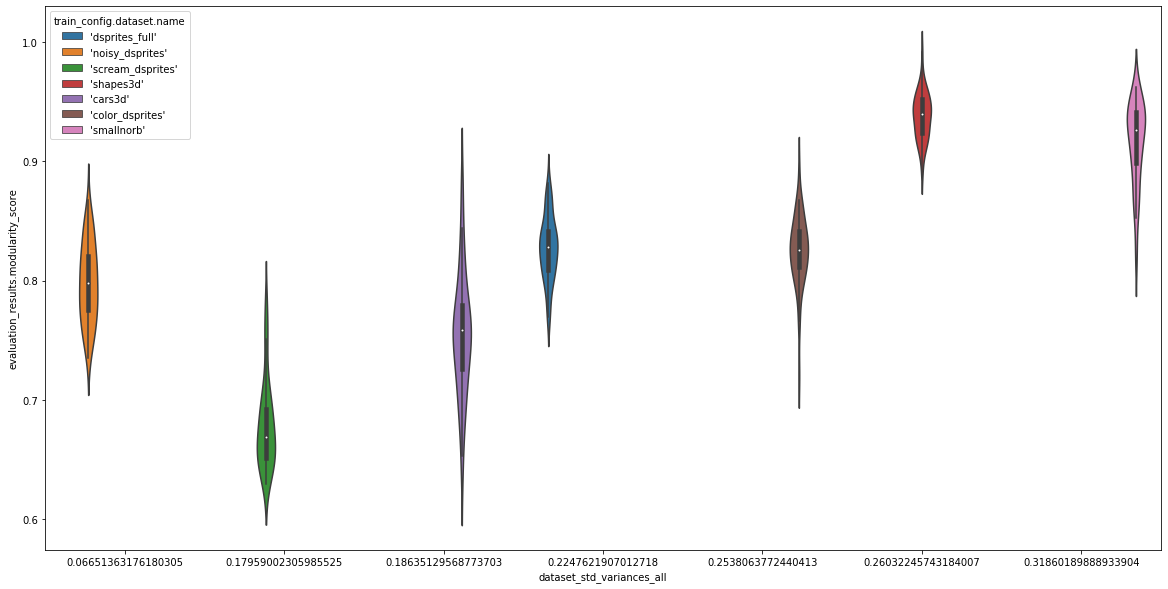

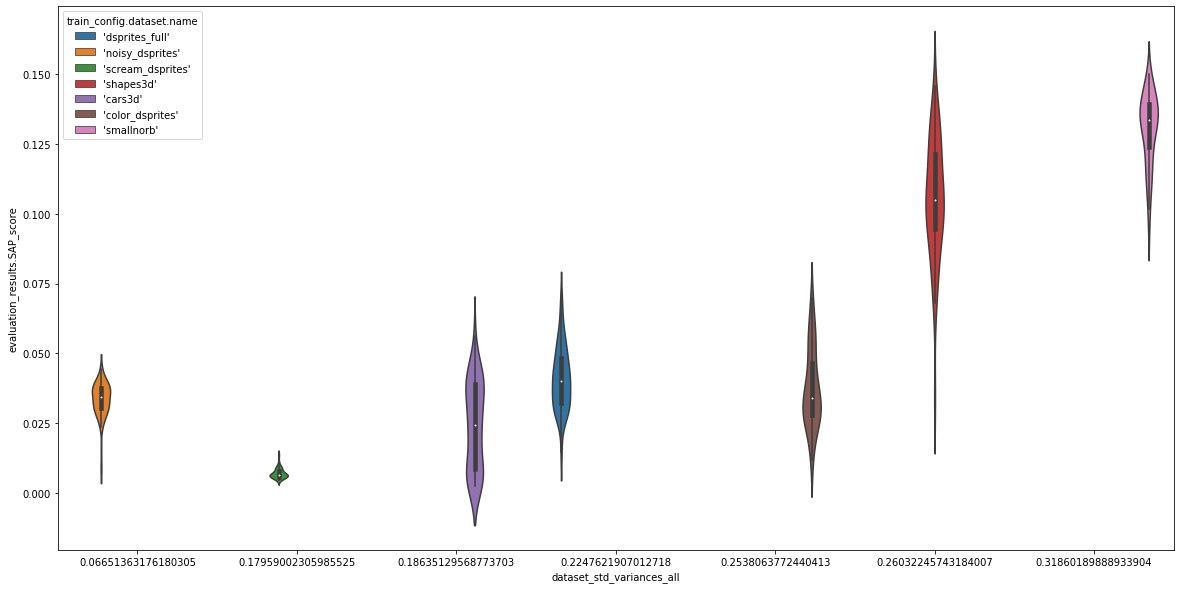

In [20]:
plot_violin('hnlpca', 'dataset_std_variances_all')

dsprites_full 0.2247621907012718


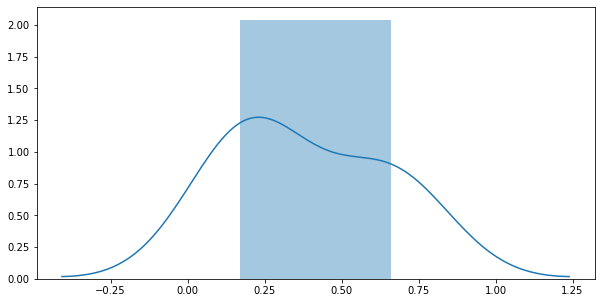

color_dsprites 0.2538063772440413


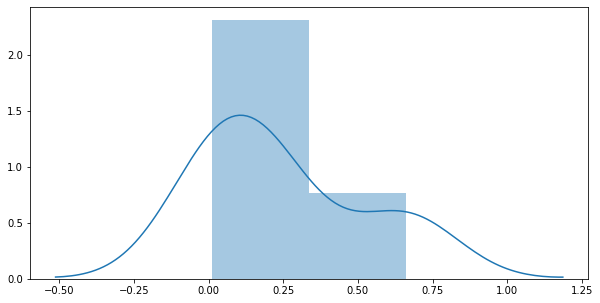

noisy_dsprites 0.06651363176180305


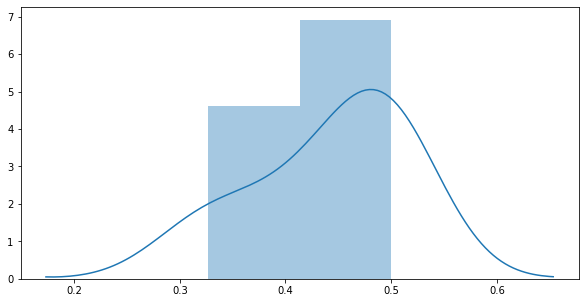

scream_dsprites 0.17959002305985525


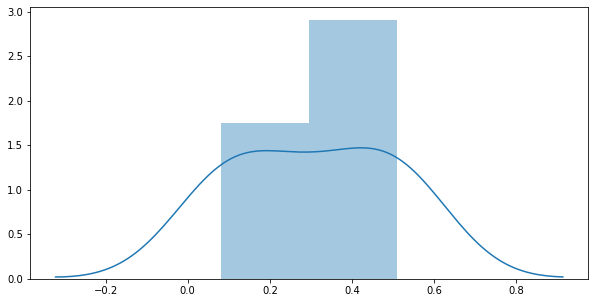

smallnorb 0.31860189888933904


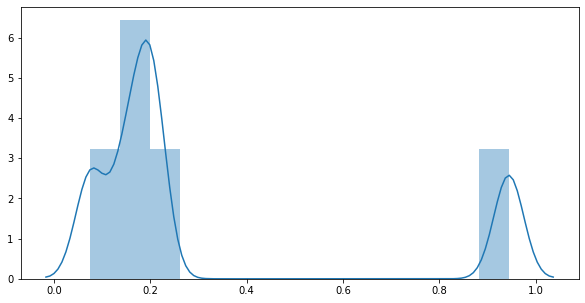

cars3d 0.18635129568773703


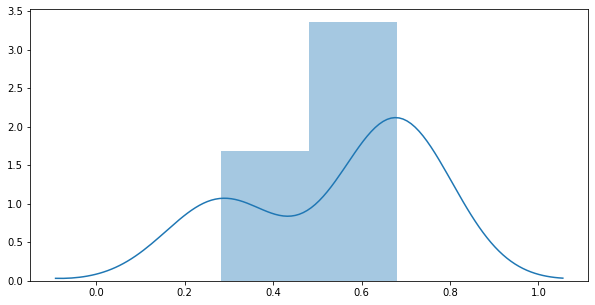

shapes3d 0.26032245743184007


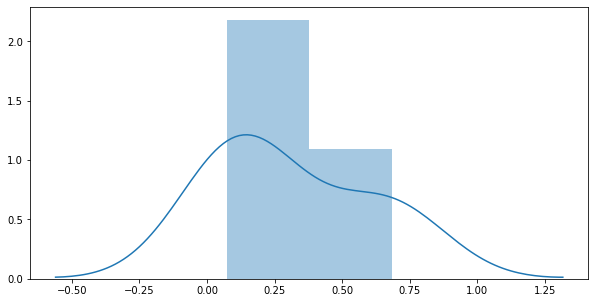

In [16]:
for dataset in df_contribs['dataset'].unique():
    contribs_dataset = df_contribs.loc[df_contribs['dataset'] == dataset].iloc[0]
    sns.distplot(
        contribs_dataset['variances_all'],
        label=dataset,
    )
    print(dataset, contribs_dataset['std_variances_all'])
    plt.show()